In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [5]:
df=pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df = df.drop('id', axis=1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.shape

(400, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [9]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [10]:
#1. Handling Missing Data

# a. Numerical columns - using SimpleImputer with mean strategy
num_cols = df.select_dtypes(include=['float64']).columns
imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# b. Categorical columns - using SimpleImputer with mode strategy
cat_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

In [11]:
# 2. Encoding Categorical Data

# Label encode the 'classification' column (target variable)
label_encoder = LabelEncoder()
df['classification'] = label_encoder.fit_transform(df['classification'])

# Convert categorical columns to dummy variables (one-hot encoding) for the remaining features
df_encoded = pd.get_dummies(df, drop_first=True)

In [12]:
# 3. Feature Scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

In [13]:
# 4. Splitting the dataset
X = df_scaled.drop(columns=['classification'])
y = df_scaled['classification']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the final processed data
print("First few rows of the preprocessed dataset:")
print(df_scaled.head())

# Display the shape of training and testing data
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

First few rows of the preprocessed dataset:
        age        bp        sg        al        su       bgr        bu   
0 -0.205464  0.262338  0.483355 -0.013338 -0.437797 -0.361987 -0.435268  \
1 -2.623810 -1.966580  0.483355  2.347516 -0.437797  0.000000 -0.800941   
2  0.620313  0.262338 -1.381391  0.773613  2.479925  3.681441 -0.089909   
3 -0.205464 -0.480635 -2.313764  2.347516 -0.437797 -0.415543 -0.028964   
4 -0.028511  0.262338 -1.381391  0.773613 -0.437797 -0.562820 -0.638420   

         sc       sod       pot  ...   htn_yes  dm_\tyes   dm_ yes     dm_no   
0 -0.333743  0.000000  0.000000  ...  1.311903 -0.070888 -0.050063 -1.362770  \
1 -0.405039  0.000000  0.000000  ... -0.762252 -0.070888 -0.050063  0.733799   
2 -0.226800  0.000000  0.000000  ... -0.762252 -0.070888 -0.050063 -1.362770   
3  0.129677 -2.885831 -0.755345  ...  1.311903 -0.070888 -0.050063  0.733799   
4 -0.298096  0.000000  0.000000  ... -0.762252 -0.070888 -0.050063  0.733799   

     dm_yes    cad_no   

In [14]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [15]:
# Separate features and target variable
X = df_encoded.drop(columns=['classification'])
y = df_encoded['classification']

# Perform the Chi-Square test on all categorical features
# Since we've one-hot encoded all categorical features, we assume all binary features are categorical
categorical_features = X.columns

# Apply Chi-Square test on the categorical variables
chi2_scores, p_values = chi2(X[categorical_features], y)

# Create a DataFrame to hold the results
chi2_results = pd.DataFrame({
    'Feature': categorical_features,
    'Chi2 Score': chi2_scores,
    'P-value': p_values
})

# Sort the results by Chi2 score in descending order
chi2_results_sorted = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Display the top 10 features based on Chi2 score
print(chi2_results_sorted.head(10))

     Feature   Chi2 Score       P-value
5        bgr  2428.925494  0.000000e+00
6         bu  2368.904828  0.000000e+00
7         sc   356.533136  3.800260e-78
3         al   228.086956  2.961740e-50
10      hemo   125.104008  6.823542e-28
0        age   121.200076  4.805491e-27
4         su   102.010508  7.058294e-23
152   rc_2.5    98.806452  3.503093e-22
197  htn_yes    89.131227  4.419774e-20
1         bp    82.402711  1.277847e-18


In [16]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select the top 10 features based on Chi-Square scores
top_features = chi2_results_sorted['Feature'].head(10).values

# Subset X to only include the top 10 features from the Chi-Square test
X_top = X[top_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# Standardize the features (Lasso regression requires scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Lasso regression
lasso = Lasso(alpha=0.01)  # Adjust alpha for the regularization strength
lasso.fit(X_train_scaled, y_train)

# Get the Lasso coefficients
lasso_coefficients = pd.DataFrame({
    'Feature': top_features,
    'Coefficient': lasso.coef_
})

# Sort coefficients in descending order of their importance
lasso_coefficients_sorted = lasso_coefficients.sort_values(by='Coefficient', ascending=False)

# Display the feature importance from Lasso regression
print(lasso_coefficients_sorted)

# Make predictions on the test data
y_pred = lasso.predict(X_test_scaled)

# Evaluate the Lasso model (you can use metrics like mean squared error for regression)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

   Feature  Coefficient
4     hemo     0.451320
1       bu     0.073216
7   rc_2.5     0.041226
5      age    -0.033147
6       su    -0.036896
9       bp    -0.063901
2       sc    -0.066551
8  htn_yes    -0.084141
0      bgr    -0.108235
3       al    -0.242505
Mean Squared Error: 0.3012
R-squared: 0.6757


c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:09:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 99.17%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           2       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



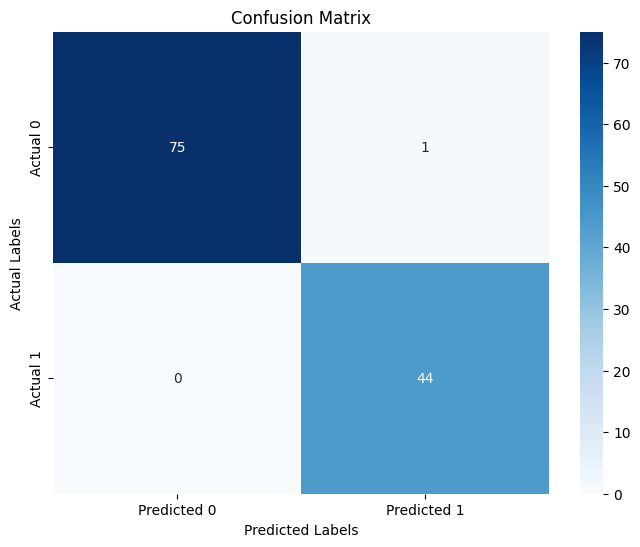

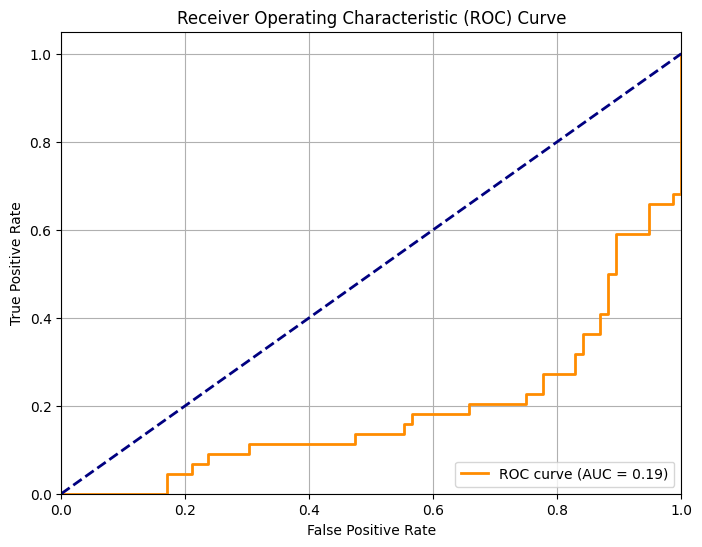

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume chi2_results_sorted and lasso_coefficients_sorted are already available
# Select the top features based on the Lasso coefficients
top_features_xgb = lasso_coefficients_sorted['Feature'][lasso_coefficients_sorted['Coefficient'] != 0].values

# Subset X to only include the top features from Lasso regression
X_top_xgb = X[top_features_xgb]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_xgb, y, test_size=0.3, random_state=42)

# Standardize the features (XGBoost can handle unscaled data but scaling can improve performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Get predicted probabilities for the positive class
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Remap labels to {0, 1} if needed
y_test_mapped = y_test.copy()
y_test_mapped[y_test_mapped == 2] = 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_mapped, y_pred_proba_xgb)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Accuracy: 90.83%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        76
           2       0.97      0.77      0.86        44

    accuracy                           0.91       120
   macro avg       0.93      0.88      0.90       120
weighted avg       0.92      0.91      0.91       120



c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


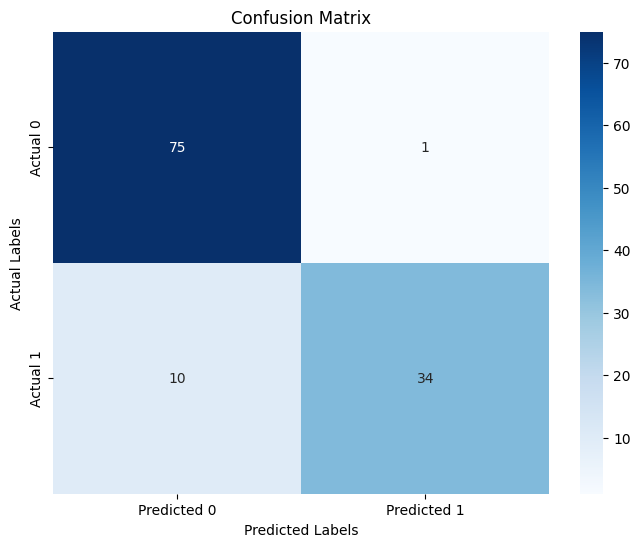

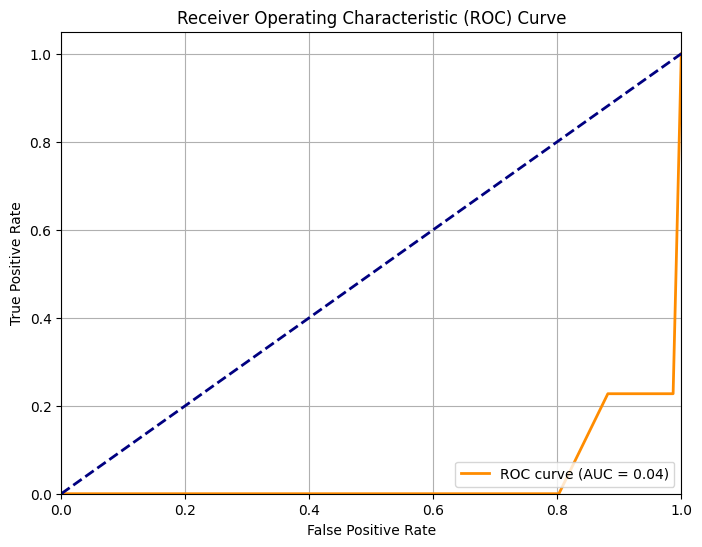

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume lasso_coefficients_sorted is already available
# Select the top features based on the Lasso coefficients
top_features_ada = lasso_coefficients_sorted['Feature'][lasso_coefficients_sorted['Coefficient'] != 0].values

# Subset X to only include the top features from Lasso regression
X_top_ada = X[top_features_ada]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_ada, y, test_size=0.3, random_state=42)

# Standardize the features (optional, but can improve performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the AdaBoost model
ada_model = AdaBoostClassifier()

# Fit the model on the training data
ada_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_ada = ada_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_ada)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_ada))

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()
# Get predicted probabilities for the positive class
y_pred_proba_ada = ada_model.predict_proba(X_test_scaled)[:, 1]

# Remap labels to {0, 1} if needed
y_test_mapped = y_test.copy()
y_test_mapped[y_test_mapped == 2] = 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_mapped, y_pred_proba_ada)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



Gradient Boosting Accuracy: 98.67
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       0.00      0.00      0.00         1

    accuracy                           0.99        75
   macro avg       0.49      0.50      0.50        75
weighted avg       0.97      0.99      0.98        75



c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

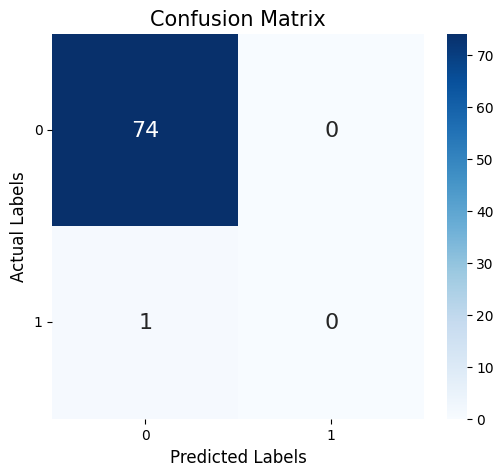

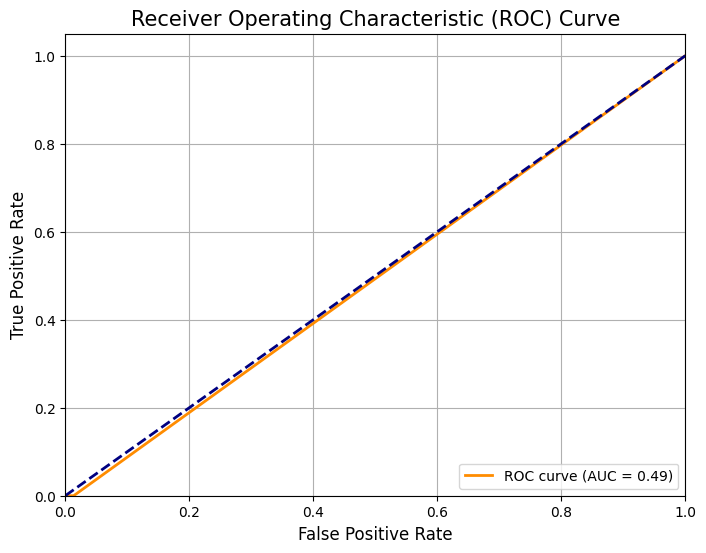

In [26]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure binary classification by filtering y to contain only two classes (0 and 1)
y_binary = y[y.isin([0, 1])]  # Keep only classes 0 and 1
X_binary = X.loc[y_binary.index]

# Select top features based on Lasso coefficients
top_features_gb = lasso_coefficients_sorted['Feature'][lasso_coefficients_sorted['Coefficient'] != 0].values
X_top_gb = X_binary[top_features_gb]

X_train, X_test, y_train, y_test = train_test_split(X_top_gb, y_binary, test_size=0.3, random_state=42, stratify=y_binary)


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Print accuracy and classification report
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb*100:.2f}')
print('Classification Report:')
print(classification_rep_gb)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Plotting the 2x2 confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, annot_kws={"size": 16})
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.xticks([0.5, 1.5], ['0', '1'])  # Adjust tick positions for clarity
plt.yticks([0.5, 1.5], ['0', '1'], rotation=0)
plt.show()

# Get predicted probabilities for the positive class (class 1)
y_pred_proba_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gb)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
